## Demo

This demo test Atrous ResNet50 and SegNet models in some images and you can try your own

In [6]:
import sys
sys.path.insert(0, 'models/')

In [7]:
import keras
import numpy as np
from utilities import i_over_u , load_image
from models.FCN import AtrousFCN_Resnet50_16s

In [8]:
import matplotlib.pyplot as plt

In [ ]:
from models.SegNet import seg_net

In [9]:
atrous_resnet50_model = AtrousFCN_Resnet50_16s(input_shape=(256,256,3) , classes=47)
atrous_resnet50_model.compile(loss='categorical_crossentropy' ,optimizer='sgd',metrics=['accuracy' , i_over_u])

In [10]:
atrous_resnet50_model.load_weights('weights/moda_dataset_weights/weights.04-0.37atrous_resnet50_last.hdf5')

In [21]:
#Load your own image
image = load_image('images/image0.jpg')

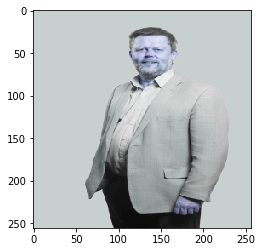

In [22]:
plt.imshow(image)

In [23]:
batch = np.zeros((1,256,256,3))
batch[0] = image
prediction = atrous_resnet50_model.predict(batch)

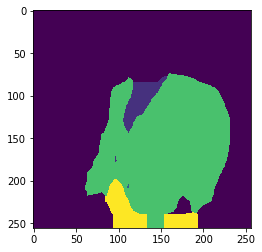

In [24]:
plt.imshow(prediction[0].argmax(-1))

In [26]:
segnet_model = seg_net((256, 256, 3))

In [27]:
segnet_model.compile(loss='categorical_crossentropy' ,optimizer='sgd',metrics=['accuracy' , i_over_u ])

In [28]:
segnet_model.load_weights('weights/moda_dataset_weights/weights.04-0.50segnet.hdf5')

In [29]:
prediction_segnet = segnet_model.predict(batch)

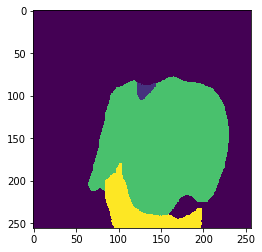

In [30]:
plt.imshow(prediction_segnet[0].argmax(-1))